In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

boston_data = load_boston()

<IPython.core.display.Javascript object>

In [3]:
def eval_preds(y_true, y_pred):
    """Display some metrics for evaluating regression predictions"""
    error = y_true - y_pred

    rmse = np.mean(np.sqrt((error ** 2)))
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs((error / y_true)))

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

    line_pts = [np.min(y_true), np.max(y_true)]
    plt.scatter(y_true, y_pred)
    plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Fit")
    plt.show()

<IPython.core.display.Javascript object>

* Investigate `boston_data` what are we working with.
* How could we put this in a dataframe with column names?
* What are we predicting?

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

<IPython.core.display.Javascript object>

In [5]:
# print(boston_data["DESCR"])

<IPython.core.display.Javascript object>

In [6]:
# boston_data["data"]

<IPython.core.display.Javascript object>

In [7]:
# boston_data["feature_names"]

<IPython.core.display.Javascript object>

In [8]:
X = pd.DataFrame(boston_data["data"], columns=boston_data["feature_names"])
y = boston_data["target"]

<IPython.core.display.Javascript object>

* Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

* Fit a `DecisionTreeRegressor` with default hyperparameters and report the train and test scores

In [10]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<IPython.core.display.Javascript object>

* How are we performing?

In [11]:
model.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [12]:
model.score(X_test, y_test)

0.8550490174722112

<IPython.core.display.Javascript object>

* I put a helper function named `eval_preds()` at the top of this notebook.  Apply it to evaluate our model.

rmse 0.00
mae 0.00
mape 0.00


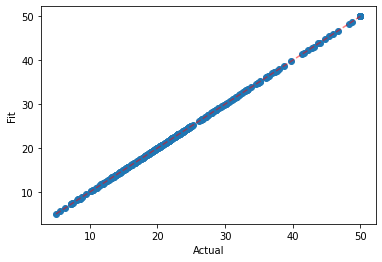

<IPython.core.display.Javascript object>

In [13]:
y_pred = model.predict(X_train)
eval_preds(y_train, y_pred)

rmse 2.36
mae 2.36
mape 0.12


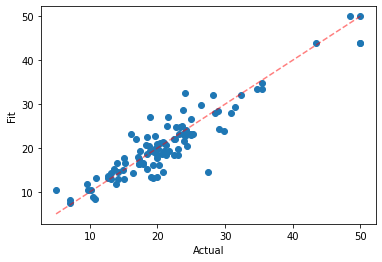

<IPython.core.display.Javascript object>

In [14]:
y_pred = model.predict(X_test)
eval_preds(y_test, y_pred)

* Plot the decision tree (we'll just use `plot_tree` here instead of pydotplus). This will take a while...

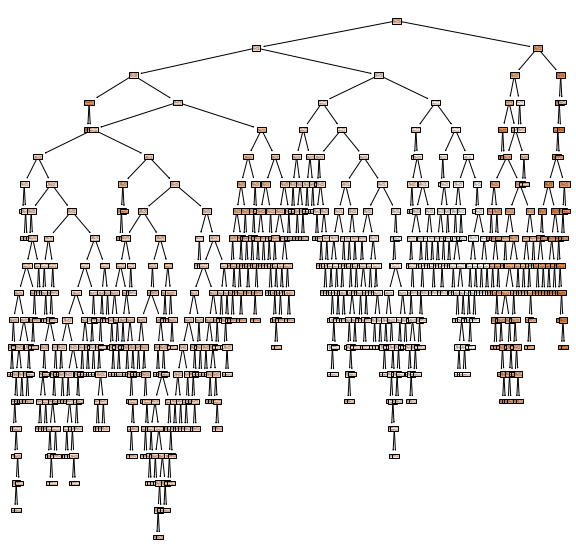

<IPython.core.display.Javascript object>

CPU times: user 24 s, sys: 3.37 s, total: 27.4 s
Wall time: 27.5 s


In [15]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

#### Group 1

* Adjust the hyperparameters of `max_depth` & `min_samples_leaf`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_depth` the more over/under fit the model becomes)
  * how the params change the look of the tree in the plot
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

#### Group 2

* Adjust the hyperparameters of `max_leaf_nodes` & `min_samples_split`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_leaf_nodes` the more over/under fit the model becomes)
  * how the params change the look of the tree
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

Hyperparameters

* ` max_depth`
    * How far it goes down (aka how many 'levels' of questions would be asked; whats the max number of questions an observation can be asked before we make a prediction)
    * The higher the number the more chance of overfitting
* ` min_samples_leaf`
    * The final predictions are made by taking the average of the observations in each 'leaf'. This decides how many items you'll be taking the average of.
    * The lower the number the more chance of overfitting.

----

* ` max_leaf_nodes`
    * How many final predictions can your model make (remember leaf nodes are the final prediction nodes; excludes question nodes)
    * The higher the number the more chance of overfitting
* ` min_samples_split`
    * How many observations have to be in a node for the model to consider splitting again?
    * The lower the number the more chance of overfitting

-----

`max_depth`

train score: 0.4702641397327912
test score: 0.36021569828883965


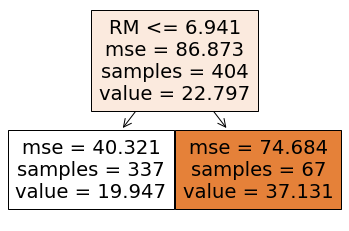

<IPython.core.display.Javascript object>

In [16]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.9416892544596489
test score: 0.8782439280592088


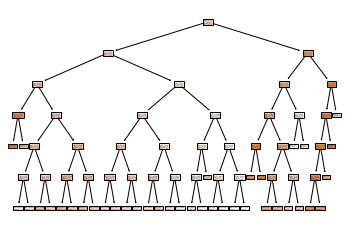

<IPython.core.display.Javascript object>

In [17]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

`min_samples_leaf`

train score: 0.5535047840327318
test score: 0.5010206841936576


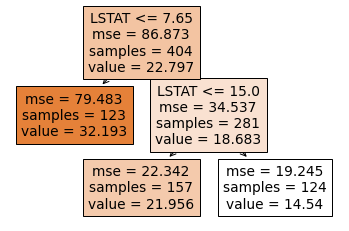

<IPython.core.display.Javascript object>

In [18]:
model = DecisionTreeRegressor(min_samples_leaf=100)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.8638162813649215
test score: 0.7791001720915263


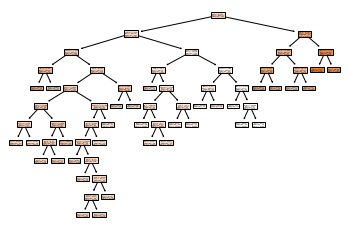

<IPython.core.display.Javascript object>

In [19]:
model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

`max_leaf_nodes`

train score: 0.4702641397327912
test score: 0.36021569828883965


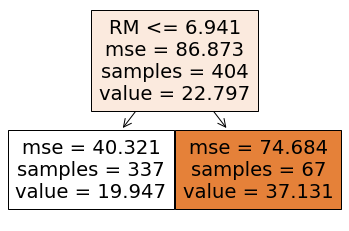

<IPython.core.display.Javascript object>

In [20]:
model = DecisionTreeRegressor(max_leaf_nodes=2)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.860437975346946
test score: 0.8577971942153857


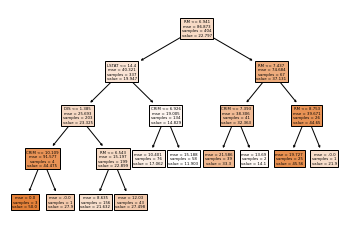

<IPython.core.display.Javascript object>

In [21]:
model = DecisionTreeRegressor(max_leaf_nodes=10)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

`min_samples_split`

train score: 0.4702641397327912
test score: 0.3602156982888398


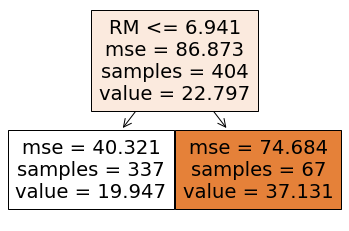

<IPython.core.display.Javascript object>

In [22]:
model = DecisionTreeRegressor(min_samples_split=350)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

train score: 0.842014432398877
test score: 0.8316838296307855


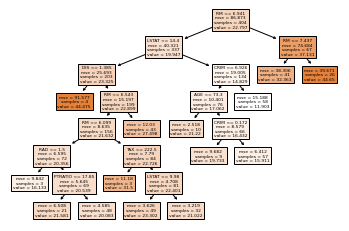

<IPython.core.display.Javascript object>

In [23]:
model = DecisionTreeRegressor(min_samples_split=64)
model.fit(X_train, y_train)

print(f"train score: {model.score(X_train, y_train)}")
print(f"test score: {model.score(X_test, y_test)}")

plt.figure()
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()